Załadowanie danych

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dane = pd.read_csv(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\datebase_yt\youtube_database.csv')

Wprowadzenie zmienych okreslających jakie kategorie występują oraz słownika który mówi nam jaka to jest kategoria

In [2]:
categories = [2, 10, 17, 24, 25]
category_map = {
    2: 'Motoryzacja',
    10: 'Muzyka',
    17: 'Sport',
    24: 'Rozrywka',
    25: 'Wiadomości i Polityka'
}

Wygenerujmy wykres który pokaże nam udział poszczególnych kategorii w całości

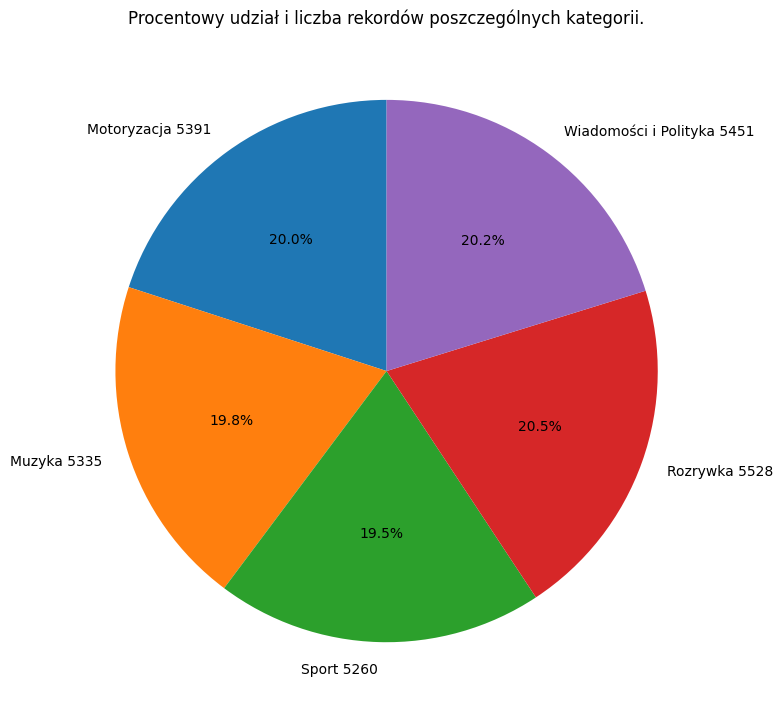

In [3]:
record_counts = [len(dane[dane['categoryId'] == category]) for category in categories]

total_records = sum(record_counts)
percentages = [(count / total_records) * 100 for count in record_counts]

plt.figure(figsize=(8, 8))
labels = [f"{category_map[category]} {count}" for category, count in zip(categories, record_counts)]
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Procentowy udział i liczba rekordów poszczególnych kategorii.')

plt.tight_layout()
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Podział kategorii.png', dpi=300)


plt.show()

Wygenerujmy wykres który pokaże nam procentowy udział kategorii w wszytskich wartościach True (1) w kolumnie madeForKids

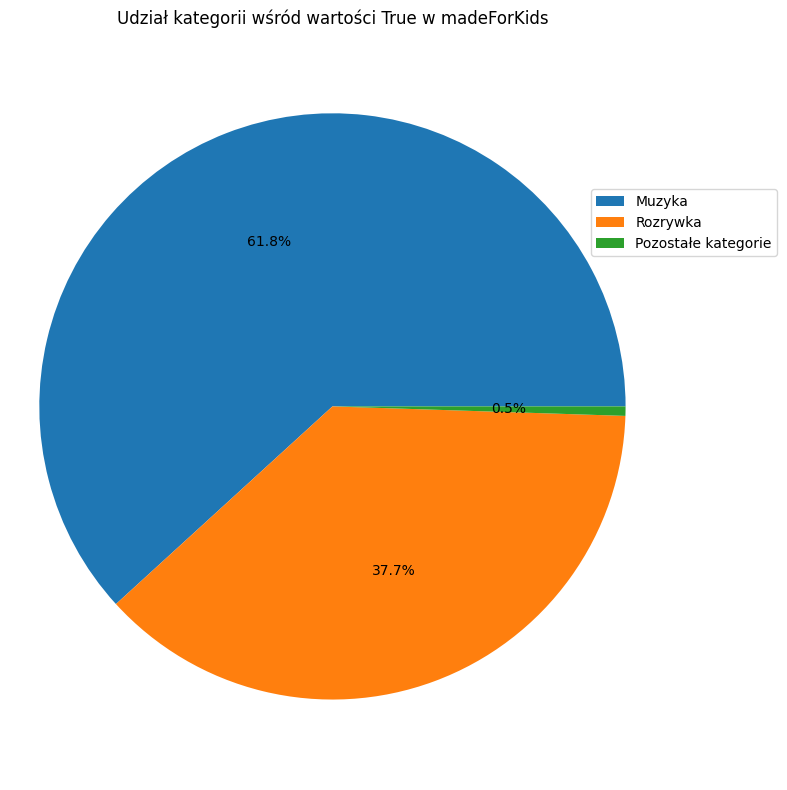

In [4]:
category_true_counts = dane[dane['madeForKids'] == 1]['categoryId'].value_counts()

category_true_ratios = category_true_counts / dane['madeForKids'].sum()

labels = ['10', '24']
sizes = [category_true_ratios.get(10, 0), category_true_ratios.get(24, 0)]
other_size = 1 - sum(sizes)
sizes.append(other_size)
labels.append(f"Mniejsze niż {other_size*100:.1f}%")

plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else '')
plt.title('Udział kategorii wśród wartości True w madeForKids')

plt.axis('equal')

legend_labels = ['Muzyka', 'Rozrywka', 'Pozostałe kategorie']
plt.legend(labels=legend_labels ,bbox_to_anchor=(0.89, 0.8))
plt.tight_layout()
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Diagram_true_do_reszty.png', dpi=300)
plt.show()

Sprawdzmy czy w drugą stronę wykres dostarczy nam rónie dużo informacji, madeForKids Flase (0)

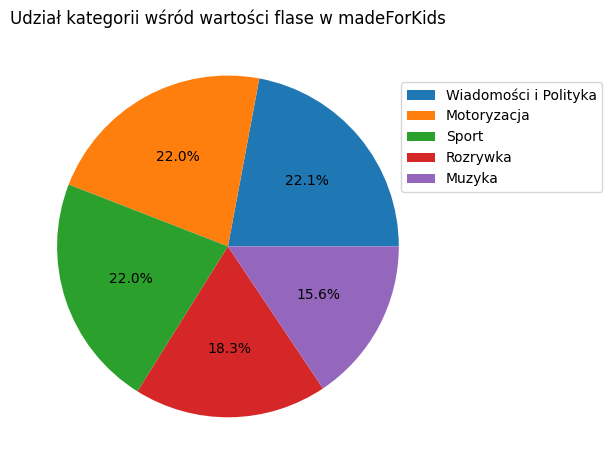

In [5]:
category_counts = dane['categoryId'].value_counts()
category_false_counts = dane[dane['madeForKids'] == 0]['categoryId'].value_counts()

categories_with_false = category_false_counts.index
category_false_ratios = category_false_counts / category_counts.loc[categories_with_false]

labels = [category_map[category] for category in category_false_ratios.index]
plt.pie(category_false_ratios, autopct='%1.1f%%')
plt.title('Udział kategorii wśród wartości flase w madeForKids')

legend_labels = [f'{category}' for category in labels]
plt.legend(legend_labels, bbox_to_anchor=(0.89, 0.9))
plt.tight_layout()
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Diagram_false_do_reszty.png', dpi=300)
plt.show()

Wygenerujmy wykres który pokaże nam udział poszczególnych kategorii w przedziałach czasowych

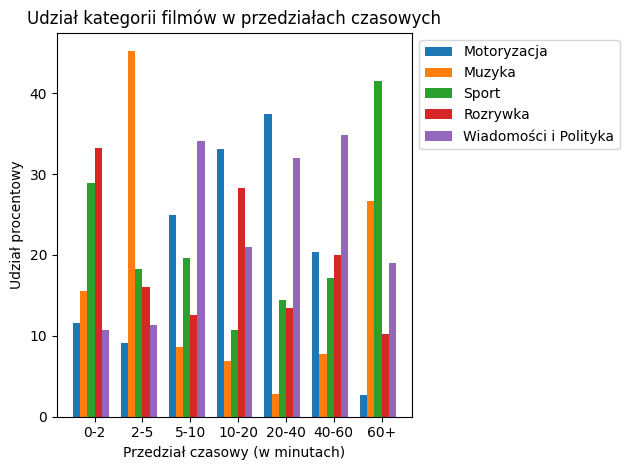

In [6]:
time_intervals = [(0, 120),(120, 300), (300, 600), (600, 1200), (1200, 2400), (2400, 3600), (3600, dane['duration_seconds'].max())]
interval_labels = ['0-2','2-5', '5-10', '10-20', '20-40', '40-60', '60+']

category_percentages = {}

for category_id, category_name in category_map.items():
    category_percentages[category_name] = []

    for interval in time_intervals:
        start_time, end_time = interval
        category_count = len(dane[(dane['categoryId'] == category_id) & (dane['duration_seconds'] >= start_time) & (dane['duration_seconds'] < end_time)])
        total_count = len(dane[(dane['duration_seconds'] >= start_time) & (dane['duration_seconds'] < end_time)])

        if total_count > 0:
            percentage = category_count / total_count * 100
        else:
            percentage = 0

        category_percentages[category_name].append(percentage)

x = np.arange(len(time_intervals))
width = 0.15

fig, ax = plt.subplots()

for i, (category_name, percentages) in enumerate(category_percentages.items()):
    ax.bar(x + (i * width), percentages, width, label=category_name)

ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='lower right')

ax.set_xticks(x + (len(category_percentages) / 2 * width))
ax.set_xticklabels(interval_labels)

plt.xlabel('Przedział czasowy (w minutach)')
plt.ylabel('Udział procentowy')
plt.title('Udział kategorii filmów w przedziałach czasowych')


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1))
fig.tight_layout()
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Udział kategorii filmów w przedziałach czasowych.png', dpi=400)
plt.show()

Wygenerujmy wykres który pokaże nam ile filmów danej kategorii zostało wrzucone o danej godzinie

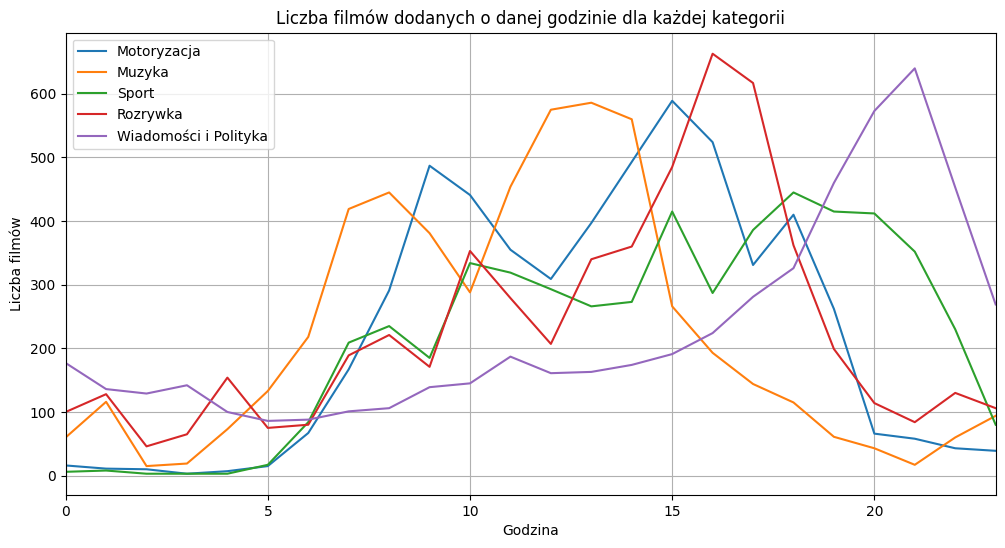

In [7]:
category_data = {}
for category in categories:
    category_data[category] = dane[dane['categoryId'] == category]

plt.figure(figsize=(12, 6))

for category in categories:
    data = category_data[category]
    hourly_counts = data.groupby(data['minutes_since_midnight'] // 60)['minutes_since_midnight'].count()
    plt.plot(hourly_counts.index, hourly_counts.values, label=category_map[category])

plt.xlabel('Godzina')
plt.ylabel('Liczba filmów')
plt.title('Liczba filmów dodanych o danej godzinie dla każdej kategorii')
plt.legend()
plt.grid(True)
plt.xlim(0, 23)
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Zależność dodania do filmu a kategorią.png', dpi=400)
plt.show()

Wygenerujmy wykres który pokaże nam udział poszczególnych kategorii w ilości wyświtleń

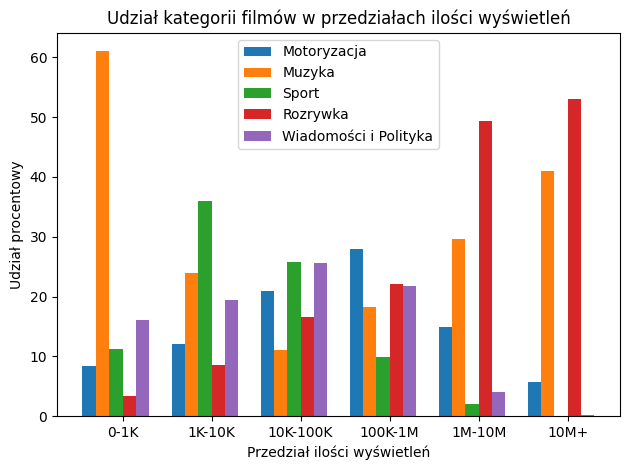

In [8]:
viewCount_intervals = [0, 1000, 10000, 100000, 1000000, 10000000, np.inf]
interval_labels = ['0-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']

category_percentages = {}

for category_id, category_name in category_map.items():
    category_percentages[category_name] = []

    for i in range(len(viewCount_intervals) - 1):
        start_count, end_count = viewCount_intervals[i], viewCount_intervals[i+1]
        category_count = len(dane[(dane['categoryId'] == category_id) & (dane['viewCount'] >= start_count) & (dane['viewCount'] < end_count)])
        total_count = len(dane[(dane['viewCount'] >= start_count) & (dane['viewCount'] < end_count)])

        if total_count > 0:
            percentage = category_count / total_count * 100
        else:
            percentage = 0

        category_percentages[category_name].append(percentage)

x = np.arange(len(viewCount_intervals) - 1)
width = 0.15

fig, ax = plt.subplots()

for i, (category_name, percentages) in enumerate(category_percentages.items()):
    ax.bar(x + (i * width), percentages, width, label=category_name)

ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='upper center')

ax.set_xticks(x + (len(category_percentages) / 2 * width))
ax.set_xticklabels(interval_labels)

plt.xlabel('Przedział ilości wyświetleń')
plt.ylabel('Udział procentowy')
plt.title('Udział kategorii filmów w przedziałach ilości wyświetleń')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0))
fig.tight_layout()

# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Zależność wyświetleń od kategorią.png', dpi=400)
plt.show()

Wygenerujmy wykres który pokaże nam udział poszczególnych kategorii w ilości komenatrzy

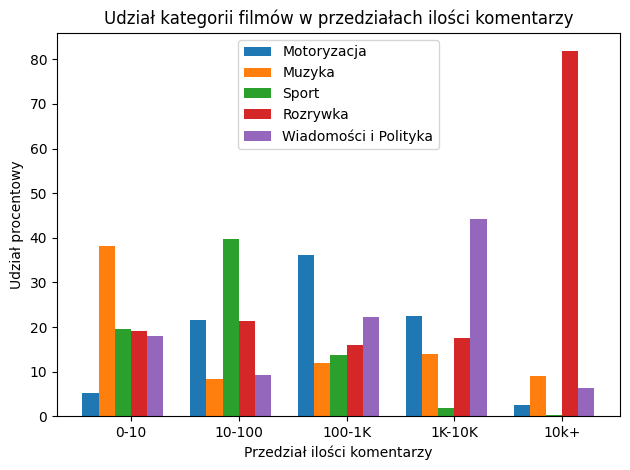

In [9]:
viewCount_intervals = [0, 10, 100, 1000, 10000,  np.inf]
interval_labels = ['0-10', '10-100', '100-1K', '1K-10K', '10k+']

category_percentages = {}

for category_id, category_name in category_map.items():
    category_percentages[category_name] = []

    for i in range(len(viewCount_intervals) - 1):
        start_count, end_count = viewCount_intervals[i], viewCount_intervals[i+1]
        category_count = len(dane[(dane['categoryId'] == category_id) & (dane['commentCount'] >= start_count) & (dane['commentCount'] < end_count)])
        total_count = len(dane[(dane['commentCount'] >= start_count) & (dane['commentCount'] < end_count)])

        if total_count > 0:
            percentage = category_count / total_count * 100
        else:
            percentage = 0

        category_percentages[category_name].append(percentage)

x = np.arange(len(viewCount_intervals) - 1)
width = 0.15

fig, ax = plt.subplots()

for i, (category_name, percentages) in enumerate(category_percentages.items()):
    ax.bar(x + (i * width), percentages, width, label=category_name)

ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='upper center')

ax.set_xticks(x + (len(category_percentages) / 2 * width))
ax.set_xticklabels(interval_labels)

plt.xlabel('Przedział ilości komentarzy')
plt.ylabel('Udział procentowy')
plt.title('Udział kategorii filmów w przedziałach ilości komentarzy')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0))
fig.tight_layout()

# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Zależność komentarzy od kategorią.png', dpi=400)
plt.show()

Wygenerujmy wykres który pokaże nam udział poszczególnych kategorii w ilości polubień

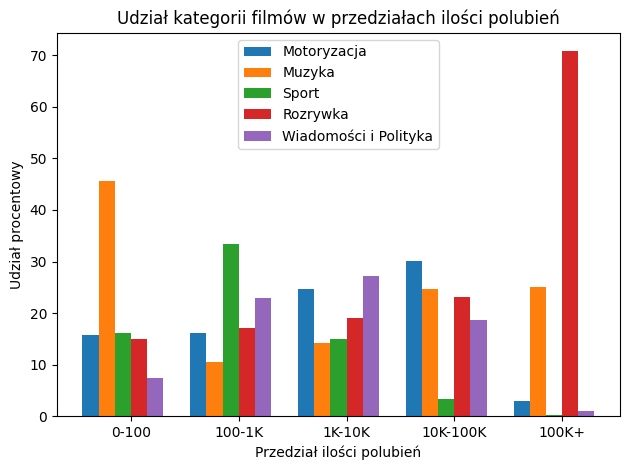

In [10]:
viewCount_intervals = [0, 100, 1000, 10000, 100000, np.inf]
interval_labels = ['0-100', '100-1K', '1K-10K', '10K-100K', '100K+']

category_percentages = {}

for category_id, category_name in category_map.items():
    category_percentages[category_name] = []

    for i in range(len(viewCount_intervals) - 1):
        start_count, end_count = viewCount_intervals[i], viewCount_intervals[i+1]
        category_count = len(dane[(dane['categoryId'] == category_id) & (dane['likeCount'] >= start_count) & (dane['likeCount'] < end_count)])
        total_count = len(dane[(dane['likeCount'] >= start_count) & (dane['likeCount'] < end_count)])

        if total_count > 0:
            percentage = category_count / total_count * 100
        else:
            percentage = 0

        category_percentages[category_name].append(percentage)

x = np.arange(len(viewCount_intervals) - 1)
width = 0.15

fig, ax = plt.subplots()

for i, (category_name, percentages) in enumerate(category_percentages.items()):
    ax.bar(x + (i * width), percentages, width, label=category_name)

ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='upper center')

ax.set_xticks(x + (len(category_percentages) / 2 * width))
ax.set_xticklabels(interval_labels)

plt.xlabel('Przedział ilości polubień')
plt.ylabel('Udział procentowy')
plt.title('Udział kategorii filmów w przedziałach ilości polubień')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0))
fig.tight_layout()

# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\Zależność polubień od kategorią.png', dpi=400)
plt.show()

Wygenereujmy wykres który pokaże nam zaleznośćmiędzy kategoriami a days_since_2012

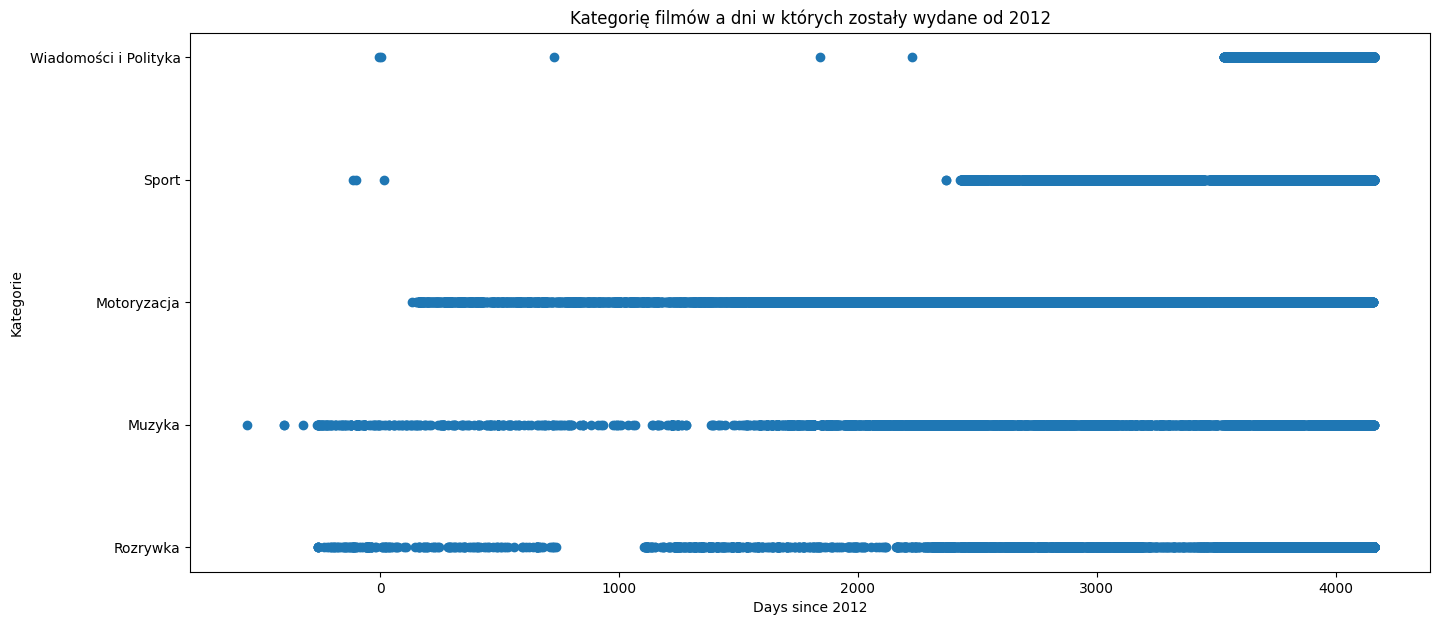

In [11]:
category_map[25] = 'Wiadomości i Polityka'

plt.figure(figsize=(16, 7))
plt.scatter(dane['days_since_2012'], dane['categoryId'].map(category_map))
plt.xlabel('Days since 2012')
plt.ylabel('Kategorie')
plt.title('Kategorię filmów a dni w których zostały wydane od 2012')
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\kategorię a dnia od 2012.png', dpi=300)
plt.show()

category_map[25] = 'WiP'

Widzimy że nasze dane nie są rozłożone równomiernie cospowodowane jest złym poraniem danych w takim razie powiniśmy usunąć ten atrybut z naszego zbioru

In [12]:
dane = dane.drop("days_since_2012", axis=1)

Podzielenie danych na dane na podstawie których będziemy klasyfikować (y) i kategorie którymi faktycznie są nasze rekordy (x)

In [13]:
X = dane.drop("id", axis=1).drop("categoryId", axis=1)
y = dane["categoryId"]

Mała modyfikacja słownika ponieważ nazwa jest zadługa

In [14]:
category_map[25] = 'WiP'

Podzielenie danych na dane tetsowe i dane treningowe

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=13, shuffle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20223, 6) (6742, 6) (20223,) (6742,)


stwórzmy pierwszy model przy pomocy klasyfikatora DecisionTreeClassifier dla wszytskich naszych atrybutów

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, Y_train)

# Predykcja na danych testowych
y_pred = model_decision_tree.predict(X_test)

# Ocena wyników klasyfikacji
report_decision_tree = classification_report(Y_test, y_pred)
print(report_decision_tree)

              precision    recall  f1-score   support

           2       0.67      0.66      0.67      1359
          10       0.75      0.75      0.75      1335
          17       0.70      0.70      0.70      1314
          24       0.68      0.68      0.68      1358
          25       0.84      0.86      0.85      1376

    accuracy                           0.73      6742
   macro avg       0.73      0.73      0.73      6742
weighted avg       0.73      0.73      0.73      6742



zapiszmy nasze dane do tabelki

In [17]:
table = []

table.append(list(f1_score(Y_test, y_pred,average=None)))
table[-1].append(f1_score(Y_test, y_pred, average='micro'))
table[-1].append(f1_score(Y_test, y_pred, average='macro'))
table[-1].append(f1_score(Y_test, y_pred, average='weighted'))
table[-1] = [round(x, 2) for x in table[-1]]
table[-1].append('DTC all attributes')
print(table)

[[0.67, 0.75, 0.7, 0.68, 0.85, 0.73, 0.73, 0.73, 'DTC all attributes']]


wyświtlmy macierz pomyłek

<Figure size 1600x800 with 0 Axes>

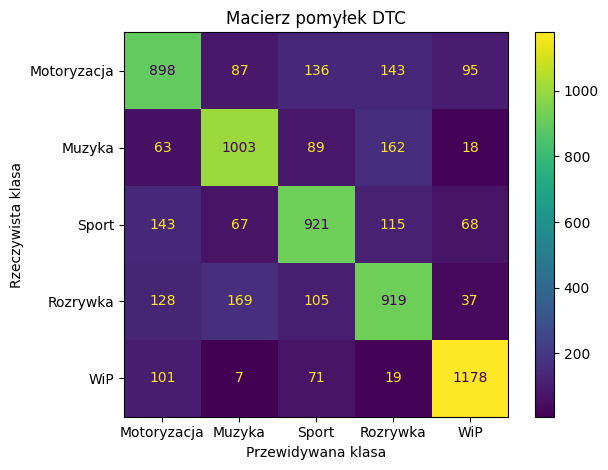

In [18]:
cm = confusion_matrix(Y_test, y_pred, labels=model_decision_tree.classes_)

# Wyświetlenie macierzy pomyłek
class_labels = [category_map[label] for label in model_decision_tree.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(16, 8))
disp.plot()

plt.title("Macierz pomyłek DTC")
plt.xlabel("Przewidywana klasa")
plt.ylabel("Rzeczywista klasa")
plt.grid(False)

plt.tight_layout()
plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\klasyfikacja DTC.png', dpi=150)
plt.show()

Teraz sprawdzmy czy RandomForestClassifier poradzi sobie lepiej z naszymi danymi

In [19]:
from sklearn.ensemble  import RandomForestClassifier

model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, Y_train)

# Predykcja na danych testowych
y_pred = model_random_forest.predict(X_test)

# Ocena wyników klasyfikacji
report_random_forest = classification_report(Y_test, y_pred)
print(report_random_forest)

              precision    recall  f1-score   support

           2       0.77      0.76      0.76      1359
          10       0.82      0.85      0.84      1335
          17       0.79      0.78      0.79      1314
          24       0.81      0.76      0.78      1358
          25       0.89      0.92      0.90      1376

    accuracy                           0.81      6742
   macro avg       0.81      0.81      0.81      6742
weighted avg       0.81      0.81      0.81      6742



tak jak wcześniej zapiszmy je sobie do tabelki

In [20]:
table.append(list(f1_score(Y_test, y_pred,average=None)))
table[-1].append(f1_score(Y_test, y_pred, average='micro'))
table[-1].append(f1_score(Y_test, y_pred, average='macro'))
table[-1].append(f1_score(Y_test, y_pred, average='weighted'))
table[-1] = [round(x, 2) for x in table[-1]]
table[-1].append('RFC all attributes')

print(table)

[[0.67, 0.75, 0.7, 0.68, 0.85, 0.73, 0.73, 0.73, 'DTC all attributes'], [0.76, 0.84, 0.79, 0.78, 0.9, 0.81, 0.81, 0.81, 'RFC all attributes']]


oraz wyśietlmy macierz pomyłek

<Figure size 1600x800 with 0 Axes>

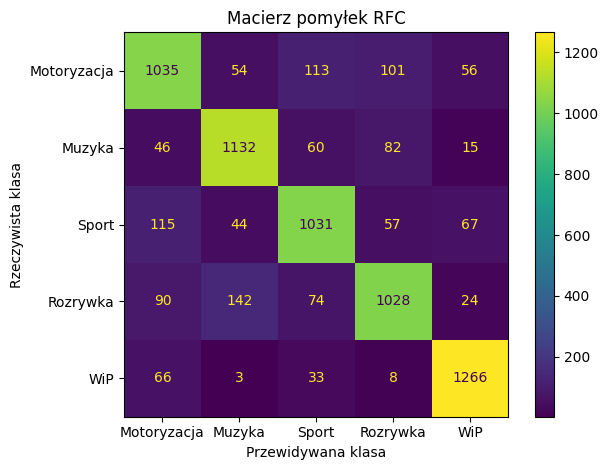

In [21]:

cm = confusion_matrix(Y_test, y_pred, labels=model_random_forest.classes_)

# Wyświetlenie macierzy pomyłek
class_labels = [category_map[label] for label in model_random_forest.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(16, 8))
disp.plot()

# Dodatkowe konfiguracje wykresu
plt.title("Macierz pomyłek RFC")
plt.xlabel("Przewidywana klasa")
plt.ylabel("Rzeczywista klasa")
plt.grid(False)

plt.tight_layout()
plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\klasyfikacja RFC.png', dpi=300)
# Wyświetlenie wykresu
plt.show()

dodajmy nagłowki w naszej tabelce

In [35]:
columns = ['F1-score motoryzacja', 'F1-score muzyka', 'F1-score sport', 'F1-score rozrywka', 'F1-score WiP', 'F1-score dokładność', 'F1-score średnia arytmetyczna', 'F1-score średnia ważona', 'Model']

df = pd.DataFrame(table, columns=columns)
df = df.reindex(columns=['Model'] + columns[:-1])

print(df)

                                 Model  F1-score motoryzacja  F1-score muzyka   
0                DTC without viewCount                  0.62             0.74  \
1             DTC without commentCount                  0.59             0.73   
2                DTC without likeCount                  0.59             0.71   
3              DTC without madeForKids                  0.67             0.74   
4         DTC without duration_seconds                  0.58             0.69   
5   DTC without minutes_since_midnight                  0.60             0.71   
6                RFC without viewCount                  0.72             0.81   
7             RFC without commentCount                  0.69             0.80   
8                RFC without likeCount                  0.68             0.79   
9              RFC without madeForKids                  0.76             0.82   
10        RFC without duration_seconds                  0.68             0.76   
11  RFC without minutes_sinc

i wyświtlmy ją oraz zapiszmy

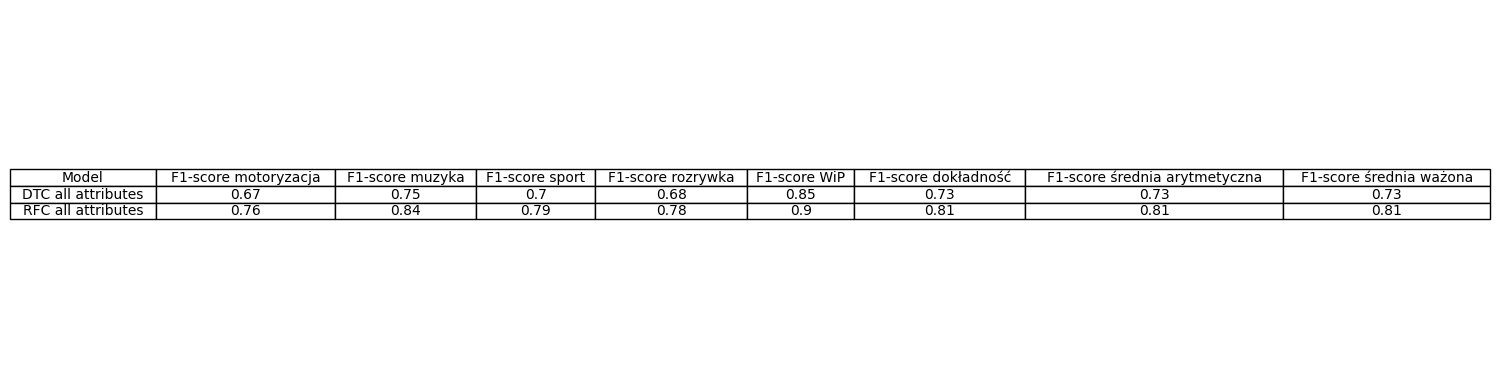

In [23]:
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns.tolist(), cellLoc='center', loc='center')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8])

# df.to_csv(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\table DTC vs RFC.csv',index=False)
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\table DTC vs RFC', bbox_inches='tight', pad_inches=0,dpi=600)

możemy sprawdzić czy któryś z atrybutów jest zbyteczny za pomocą klasyfikacji resztą atrybutów (dane zapisujemy do tabelki)

In [39]:
columns_attributes = ['viewCount', 'commentCount', 'likeCount', 'madeForKids', 'duration_seconds', 'minutes_since_midnight']


model_decision_tree = DecisionTreeClassifier()
table = []

for attribute in columns_attributes:
    model_decision_tree.fit(X_train.drop(attribute, axis=1), Y_train)
    y_pred = model_decision_tree.predict(X_test.drop(attribute, axis=1))

    table.append(list(f1_score(Y_test, y_pred,average=None)))
    table[-1].append(f1_score(Y_test, y_pred, average='micro'))
    table[-1].append(f1_score(Y_test, y_pred, average='macro'))
    table[-1].append(f1_score(Y_test, y_pred, average='weighted'))
    table[-1] = [round(x, 2) for x in table[-1]]
    table[-1].append('DTC without ' + attribute)


model_random_forest = RandomForestClassifier()

for attribute in columns_attributes:
    model_random_forest.fit(X_train.drop(attribute, axis=1), Y_train)
    y_pred = model_random_forest.predict(X_test.drop(attribute, axis=1))

    table.append(list(f1_score(Y_test, y_pred,average=None)))
    table[-1].append(f1_score(Y_test, y_pred, average='micro'))
    table[-1].append(f1_score(Y_test, y_pred, average='macro'))
    table[-1].append(f1_score(Y_test, y_pred, average='weighted'))
    table[-1] = [round(x, 2) for x in table[-1]]
    table[-1].append('RFC without ' + attribute)

print(table)



[[0.62, 0.73, 0.63, 0.66, 0.78, 0.69, 0.69, 0.69, 'DTC without viewCount'], [0.58, 0.74, 0.61, 0.65, 0.62, 0.64, 0.64, 0.64, 'DTC without commentCount'], [0.59, 0.72, 0.63, 0.67, 0.83, 0.69, 0.69, 0.69, 'DTC without likeCount'], [0.67, 0.73, 0.69, 0.67, 0.83, 0.72, 0.72, 0.72, 'DTC without madeForKids'], [0.57, 0.69, 0.63, 0.59, 0.81, 0.66, 0.66, 0.66, 'DTC without duration_seconds'], [0.61, 0.71, 0.66, 0.62, 0.82, 0.68, 0.68, 0.68, 'DTC without minutes_since_midnight'], [0.73, 0.81, 0.72, 0.75, 0.85, 0.77, 0.77, 0.77, 'RFC without viewCount'], [0.69, 0.8, 0.71, 0.75, 0.71, 0.73, 0.73, 0.73, 'RFC without commentCount'], [0.68, 0.79, 0.7, 0.76, 0.89, 0.77, 0.76, 0.76, 'RFC without likeCount'], [0.76, 0.82, 0.78, 0.77, 0.89, 0.8, 0.8, 0.8, 'RFC without madeForKids'], [0.68, 0.75, 0.73, 0.66, 0.87, 0.74, 0.74, 0.74, 'RFC without duration_seconds'], [0.69, 0.79, 0.73, 0.71, 0.88, 0.76, 0.76, 0.76, 'RFC without minutes_since_midnight']]


tak jak wcześniej dodajemy nagłówki i zapisujemy

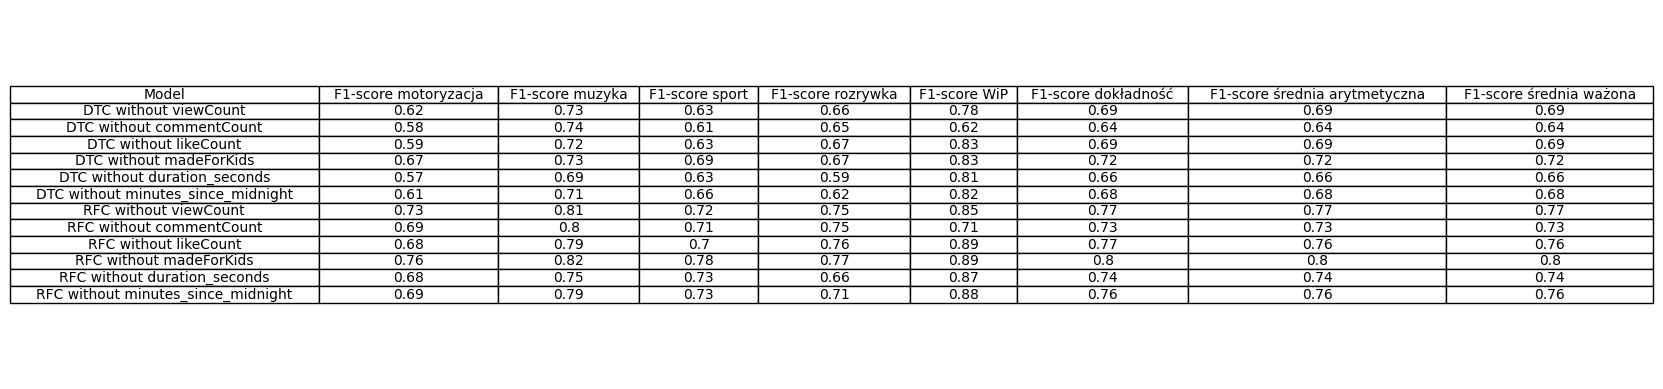

In [40]:


df = pd.DataFrame(table, columns=columns)
df = df.reindex(columns=['Model'] + columns[:-1])

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns.tolist(), cellLoc='center', loc='center')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8])

# df.to_csv(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\table DTC and RFC without atribute.csv',index=False)
# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\table DTC and RFC without atribute', bbox_inches='tight', pad_inches=0,dpi=600)

Widzimy że przy usnięciu jakiegokolwiek atrybutu wyniki są gorsze więc nie bedziemy nic usuwać

Jak widzimy wynik jest gorszy ale o 1 % więc można go usunąć ale w sumie szkoda nam 1 %

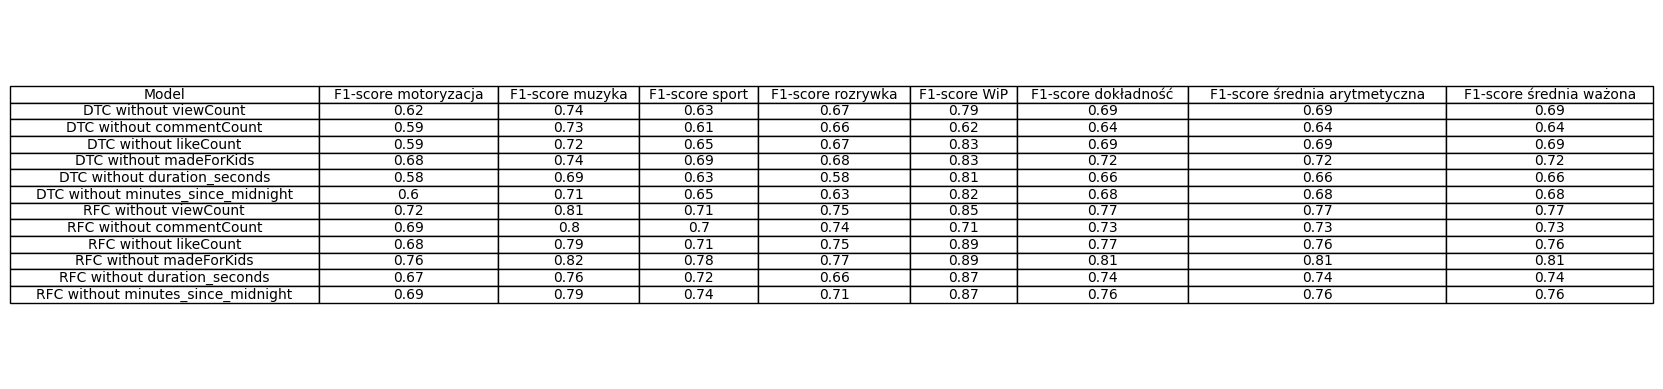

In [27]:

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns.tolist(), cellLoc='center', loc='center')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8])


# plt.savefig(r'D:\Studia\4 semestr\MSID\L\Projekt MSID\diagrams\table DTC and RFC without days_since_2012 and MadeForKids', bbox_inches='tight', pad_inches=0,dpi=600)